In [1]:
# verify whether grid you have created makes sense
# TODO:
# 1. read through all data
# 2. combine all global scene coordinates together
# 3. save them into a .ply file with color encoding for the regions you have created.
# (remember to shuffle list of colors to make it more readable.)

In [3]:
code_dir = "/home/mlmi-2020/jz522/localisation_from_image_project/code"
import os, sys
if code_dir not in sys.path:
    sys.path.append(code_dir)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [6]:
import numpy as np
import json
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
data_dir = "/data/cornucopia/jz522/localisation_project/DS_003_JDB-Full/coordinates_256_512_complete_working_141_classes/"

In [10]:
data_size = 370
images = np.zeros((data_size, 256, 512, 3), dtype=np.float32)
scene_coords = np.zeros((data_size, 256, 512, 3), dtype=np.float32)
regions = np.zeros((data_size, 256, 512), dtype=np.float32)

for data in tqdm(range(1,data_size + 1)):
    coord_npz = f"{data:04}_rendered.png_config.npz"
    npz_data = np.load(data_dir + coord_npz)
    
    images[int(data)-1,:,:,:] = npz_data['image_colors']
    scene_coords[int(data)-1,:,:,:] = npz_data['points_3d_world'] 
    regions[int(data)-1,:,:] = npz_data['points_region_class']

100%|██████████| 370/370 [03:57<00:00,  1.56it/s]


In [59]:
def writePlyFile(file_dir, file_name, vertices, colors, sample=0):
    ply_header = '''ply
                format ascii 1.0
                element vertex %(vert_num)d
                property float x
                property float y
                property float z
                property uchar red
                property uchar green
                property uchar blue
                end_header
            '''
    vertices = vertices.reshape(-1, 3)
    colors = colors.reshape(-1, 3)
    vertices = np.hstack([vertices, colors])
    
    if sample != 0:
#         print(vertices.shape)
        num_points = int(vertices.shape[0] / sample)
        indices = np.random.choice(vertices.shape[0], size=num_points, replace=False)
        vertices = vertices[indices]
    
    with open(file_dir + file_name, 'w') as f:
        f.write(ply_header % dict(vert_num=len(vertices)))
        np.savetxt(f, vertices, '%f %f %f %d %d %d')

In [44]:
scene_coords_flat = np.reshape(scene_coords, (-1,3))
regions_flat = np.reshape(regions, (-1))
# get 141 distinct colors
colors = np.random.randint(0, high=256, size=(141,3), dtype=int)

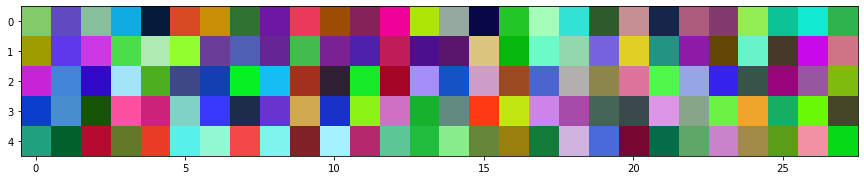

In [46]:
# show generated colors 
colors_tmp = np.reshape(colors[:140], (5, 28, 3))
plt.figure(figsize=(15,10))
plt.imshow(colors_tmp)
plt.show()

In [51]:
color_points = [colors[point] for point in regions_flat.astype(int)]

In [53]:
color_points = np.array(color_points)
color_points.shape

(48496640, 3)

# save every 100th point

In [55]:
file_dir = "/home/mlmi-2020/jz522/localisation_from_image_project/debugging/debuging_and_inspecting_data/region_grid_data/"

In [60]:
file_name = "regions_vis_sampled_100.ply"
writePlyFile(file_dir, file_name, scene_coords_flat, color_points, sample=100)

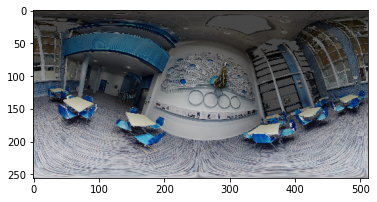

In [61]:
plt.imshow(images[199])

In [ ]:
plt.imshow()